# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Lana\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


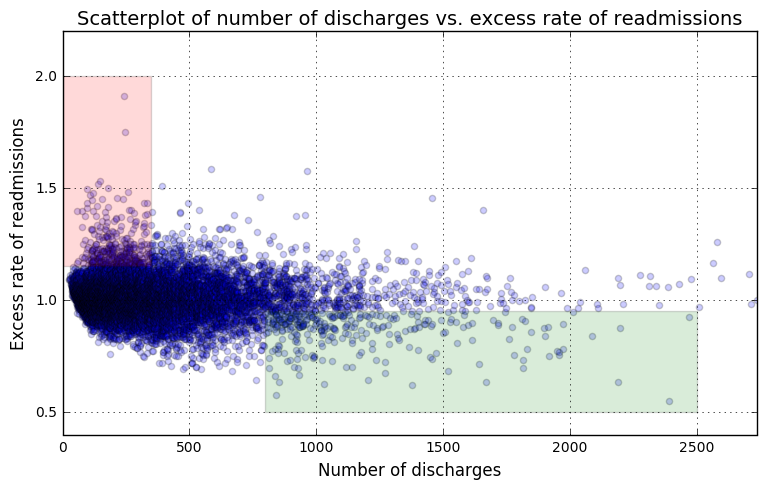

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Visually analyzing available evidence/chart

First, let's consider the chart and visually analyze it. Because most of the points are clustered in one area, with the number of discharges less than 500 and the excess rate of readmission around 1, it's hard to see any pattern in the chart. Hence, just by looking at the graph, it's impossible to say whether the rate of readmission is trending down with increasing number of discharges. Later in this exercise, we will try to dissect the chart in more detail to draw better conclusions and will employ hypothesis testing to form any recommendations.

### Checking available statistics for mistakes

Next, let's double check that the statistics provided in part B of the preliminary report are correct. 

<b> Statement: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 </b> 

In [6]:
low_discharges = clean_hospital_read_df['Number of Discharges'] < 100
low_discharges_df = clean_hospital_read_df[low_discharges]

In [7]:
low_discharges_df['Excess Readmission Ratio'].mean()

1.0226183501683506

In [8]:
low_discharges_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 16857 to 4449
Data columns (total 12 columns):
Hospital Name                 1269 non-null object
Provider Number               1269 non-null int64
State                         1269 non-null object
Measure Name                  1269 non-null object
Number of Discharges          1269 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      1188 non-null float64
Predicted Readmission Rate    1188 non-null float64
Expected Readmission Rate     1188 non-null float64
Number of Readmissions        1188 non-null float64
Start Date                    1269 non-null object
End Date                      1269 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 123.9+ KB


We know that there are 1188 non-null values for excess readmission rate. Now let's check how many of those are above 1 to check the second part 

In [9]:
excess_readmission_above_1 = low_discharges_df['Excess Readmission Ratio'] > 1
excess_readmission_above_1_df = low_discharges_df[excess_readmission_above_1]
excess_readmission_above_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 1832 to 4449
Data columns (total 12 columns):
Hospital Name                 751 non-null object
Provider Number               751 non-null int64
State                         751 non-null object
Measure Name                  751 non-null object
Number of Discharges          751 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      751 non-null float64
Predicted Readmission Rate    751 non-null float64
Expected Readmission Rate     751 non-null float64
Number of Readmissions        751 non-null float64
Start Date                    751 non-null object
End Date                      751 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 73.3+ KB


Based on this, we see that there are 751 hospitals in this group with readmission rate above 1 and discharges less than 100.

In [10]:
751/1188

0.6321548821548821

So far, it might seem that everything is correct. All the numbers match up: the average excess readmission rate for hospitals with fewer than 100 discharges is 1.023 as stated, with 63% of those hospitals having excess readmission rate above 1.

Let's do the same for the second statement.

<b>Statement: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1</b>

In [11]:
high_discharges = clean_hospital_read_df['Number of Discharges'] > 1000
high_discharges_df = clean_hospital_read_df[high_discharges]

In [12]:
high_discharges_df['Excess Readmission Ratio'].mean()

0.9783354211663071

In [13]:
high_discharges_df.count()

Hospital Name                 463
Provider Number               463
State                         463
Measure Name                  463
Number of Discharges          463
Footnote                        0
Excess Readmission Ratio      463
Predicted Readmission Rate    463
Expected Readmission Rate     463
Number of Readmissions        463
Start Date                    463
End Date                      463
dtype: int64

In [14]:
excess_readmission_above_1 = high_discharges_df['Excess Readmission Ratio'] > 1
excess_readmission_above_1_df = high_discharges_df[excess_readmission_above_1]
excess_readmission_above_1_df.count()/high_discharges_df.count()

Hospital Name                 0.444924
Provider Number               0.444924
State                         0.444924
Measure Name                  0.444924
Number of Discharges          0.444924
Footnote                           NaN
Excess Readmission Ratio      0.444924
Predicted Readmission Rate    0.444924
Expected Readmission Rate     0.444924
Number of Readmissions        0.444924
Start Date                    0.444924
End Date                      0.444924
dtype: float64

<b>Building hypothesis test</b>

Based on these two statements, it seems that the two populations, i.e. big hospitals with a high number of discharges and small hospitals with a lower number of discharges are substantially different. To examine that, we will build a hypothesis test to confirm that this in fact so. <br></br><br></br>
In this case, our null hypothesis will be that the mean excess readmission rate for big hospitals is equal to the mean excess readmission rate for small hospitals, while our alternative hypothesis will be that the two populations' means are significantly different. I will test this hypothesis at the 1% significance level.

$$H_0: \mu_{big} = \mu_{small} $$<br></br>
$$H_1: \mu_{big} != \mu_{small} $$

In [15]:
big_hospitals = high_discharges_df['Excess Readmission Ratio'].notnull()
big_hospitals = high_discharges_df[big_hospitals]['Excess Readmission Ratio']
small_hospitals = low_discharges_df['Excess Readmission Ratio'].notnull()
small_hospitals = low_discharges_df[small_hospitals]['Excess Readmission Ratio']

Because this data set is supposed to represent the entire population of hospitals in the US, we should be able to use the z-test to test for the difference of means. To be able to use the z-test, we need to safeguard ourselves by checking that a few conditions are met. <br></br>Theoretically, all observations should have been collected independently of the other, but since we are talking about the entire population of different hospitals, we can probably safely assume that. The only caveat here is that we also have observations for different units within a specific hospitals. Here we will have to assume that readmission rates in different units are independent of each other, which might be a stretch to be honest. <br></br>Finally, let's verify that both subsets of the population are approximately normally distributed.

In [16]:
import scipy.stats.mstats as stats

In [17]:
stats.normaltest(big_hospitals)

NormaltestResult(statistic=16.707705988017082, pvalue=0.00023548743652770631)

In [18]:
stats.normaltest(small_hospitals)

NormaltestResult(statistic=608.33925182077655, pvalue=7.9581093899479642e-133)

In [19]:
big_hospitals.count()

463

In [20]:
small_hospitals.count()

1188

Well, it seems that our populations are not so normally distributed after all. Let's draw a chart of both populations to examine the sampling distribution visually.

<Container object of 430 artists>

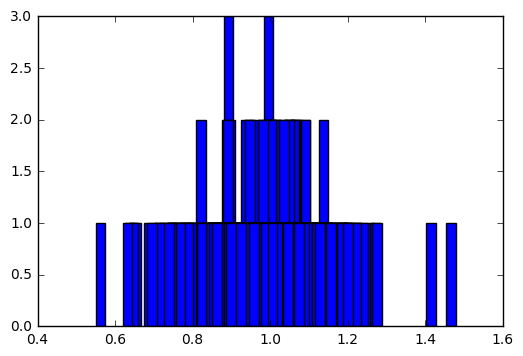

In [21]:
array_counts = big_hospitals.value_counts()
df_big_counts = pd.DataFrame(array_counts)
df_big_counts = df_big_counts.reset_index()
df_big_counts.columns = ['Excess Readmission Ratio', 'Count']
excess_ratio = df_big_counts['Excess Readmission Ratio']
count = df_big_counts['Count']
plt.bar(excess_ratio, count, 0.025)

Based on this, we can see that excess readmission rates for big hospitals are semi-normally distributed, with data skewed to the left and a few outliers. 

Given that, we will do the t-test instead of the z-test to test our hypothesis, keeping in mind that we are not dealing with a perfect normal distribution.

In [22]:
stats.ttest_ind(big_hospitals, small_hospitals)

Ttest_indResult(statistic=-10.060620398500793, pvalue=3.7787539233403766e-23)

The results are very interesting. Based on the p-value, we can reject the null hypothesis that the means are equal at 1% significance level. Essentially, this hypothesis test confirms one of the conclusions of the study that big hospitals and small hospitals have different excess readmission rates. 

### Concerns with the study

While, overall, the study seems to confirm that big hospitals and small hospitals have different excess readmission rates, with small hospitals having higher excess readmission than expected, there are a few concerns that would make me question the recommendation provided above.

First of all, it is unclear how predicted and expected readmission rates are calculated. Also, the names "expected" and "predicted" can be quite confusing to begin with.

For example, let's visualize the relationship between predicted and expected. In an ideal world, the points should follow a 45 degrees line from the origin.

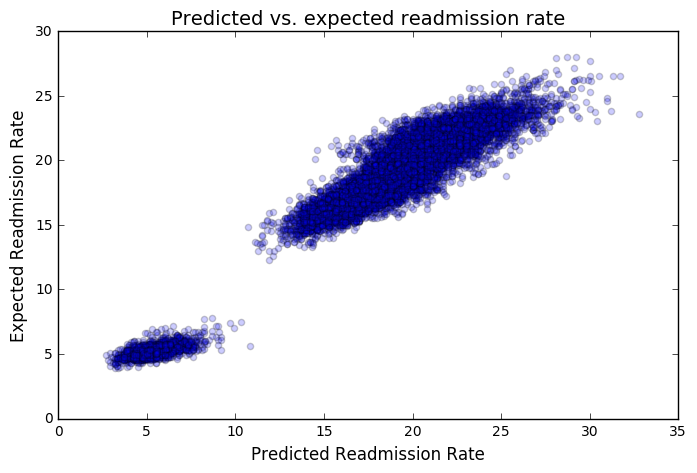

In [23]:
x = clean_hospital_read_df['Predicted Readmission Rate']
y = clean_hospital_read_df['Expected Readmission Rate']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlabel('Predicted Readmission Rate', fontsize=12)
ax.set_ylabel('Expected Readmission Rate', fontsize=12)
ax.set_title('Predicted vs. expected readmission rate', fontsize=14)

What is interesting is that there are two big clusters: one between ~%5 and ~10% predicted readmission rate and the second one starting at around 12% for predicted readmission rate. The first cluster is not as "steep" as we would project, which suggests that we would expect a smaller readmission rate for a similar hospital than what we are seeing in reality. The second cluster, however, seems to be more in line with what we would project, with expected and predicted rates roughly the same.

Let's try another chart to examine the two clusters a little closer.

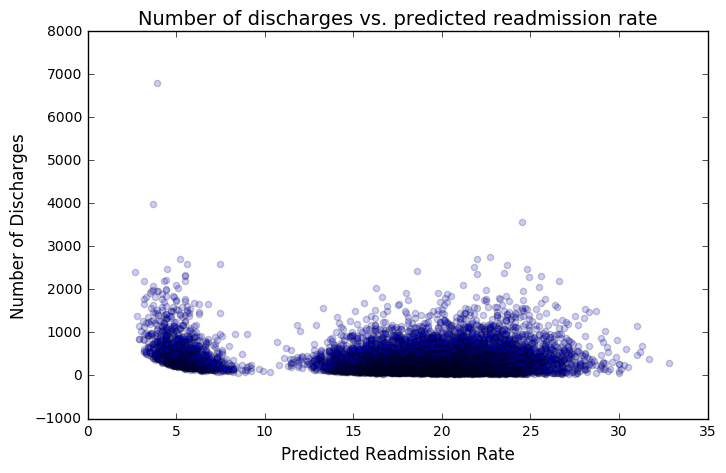

In [24]:
x = clean_hospital_read_df['Predicted Readmission Rate']
y = clean_hospital_read_df['Number of Discharges']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlabel('Predicted Readmission Rate', fontsize=12)
ax.set_ylabel('Number of Discharges', fontsize=12)
ax.set_title('Number of discharges vs. predicted readmission rate', fontsize=14)

Because of the outliers, the resulting chart is too flat and it's impossible to draw any conclusion. Let's look at the chart without the outliers.

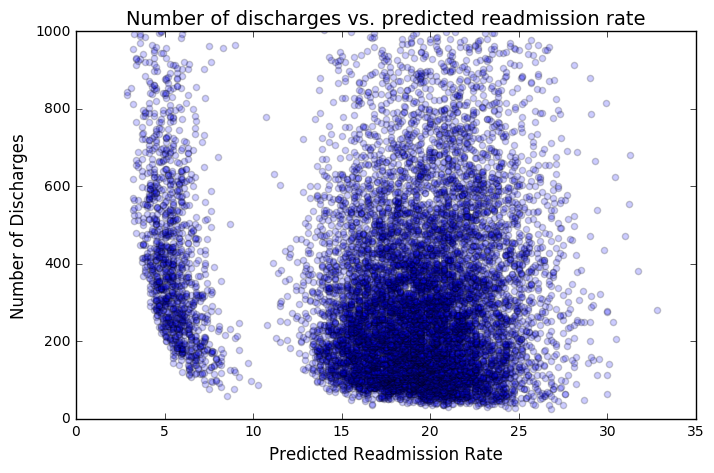

In [25]:
x = clean_hospital_read_df['Predicted Readmission Rate']
y = clean_hospital_read_df['Number of Discharges']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.set_ylim([0, 1000])

ax.set_xlabel('Predicted Readmission Rate', fontsize=12)
ax.set_ylabel('Number of Discharges', fontsize=12)
ax.set_title('Number of discharges vs. predicted readmission rate', fontsize=14)

Again, here are our two clusters. It is as if there are no hospitals with readmission rates predicted between ~5% and 13%. Not knowing the calculations and the "comparables" analysis for hospitals, I can't explain what is going on here.

Another part of the study that I would like to question is the choice of 300 discharges as the basis for increased scrutiny and decreased funding. 

Let's draw a bar graph for excess readmission rate vs. the number of discharges to visualize the cut-off point better.

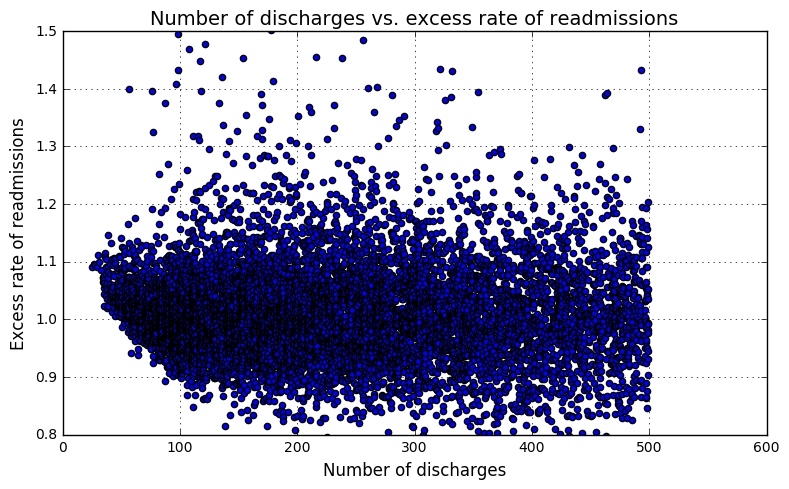

In [61]:
hospitals_in_question = clean_hospital_read_df['Number of Discharges'] < 500
hospitals_in_question_df = clean_hospital_read_df[hospitals_in_question]

x = hospitals_in_question_df['Number of Discharges']
y = hospitals_in_question_df['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y)

ax.set_ylim([0.8,1.5])

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [83]:
line_chart = hospitals_in_question_df.groupby(['Number of Discharges'])['Excess Readmission Ratio'].mean()

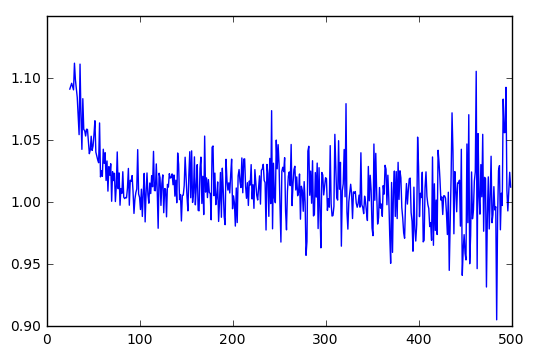

In [84]:
line_chart_df = pd.DataFrame(line_chart, index = None)
line_chart_df = line_chart_df.reset_index()
x = line_chart_df['Number of Discharges']
y = line_chart_df['Excess Readmission Ratio']
plt.plot(x,y)

This chart shows that the mean readmission rate really starts trending upward when the number of discharges for the hospital is less than ~80, i.e. for very small hospitals.

So based on that, I would not scrutinize all hospitals with discharges under 300, but will rather focus on very tiny hospitals with 80 discharges or less.

In [91]:
hospitals_in_question = clean_hospital_read_df['Number of Discharges'] < 80
hospitals_in_question_df = clean_hospital_read_df[hospitals_in_question]
hospitals_in_question_df.count()

Hospital Name                 721
Provider Number               721
State                         721
Measure Name                  721
Number of Discharges          721
Footnote                       81
Excess Readmission Ratio      640
Predicted Readmission Rate    640
Expected Readmission Rate     640
Number of Readmissions        640
Start Date                    721
End Date                      721
dtype: int64

That would limit the number of potential problematic hospitals to 721,

In [96]:
hospitals_in_question = clean_hospital_read_df['Number of Discharges'] < 300
hospitals_in_question_df = clean_hospital_read_df[hospitals_in_question]
hospitals_in_question_df['Hospital Name'].count()

6189

as opposed to more than 6000 hospitals will 300 or fewer discharges.